Average Likes per Video: 2495.69

Total Views per Category:
 Category
Education        1173817
Entertainment     498597
Gaming           1441849
Lifestyle        1440303
Tech             1082972
Name: Views, dtype: int64


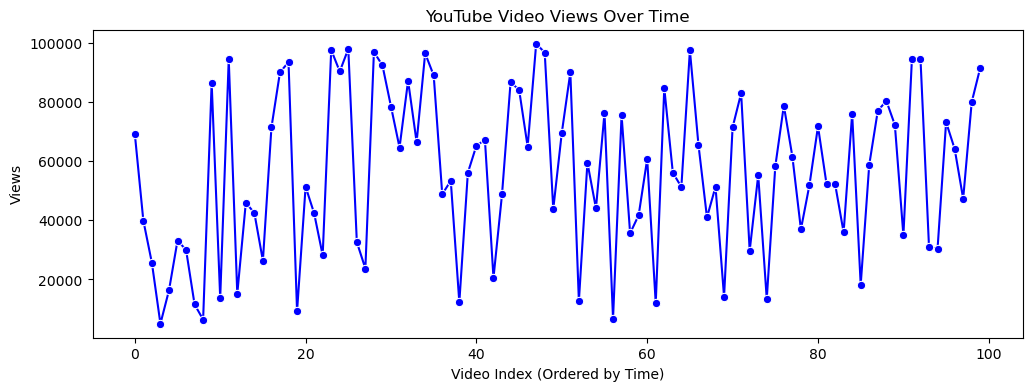

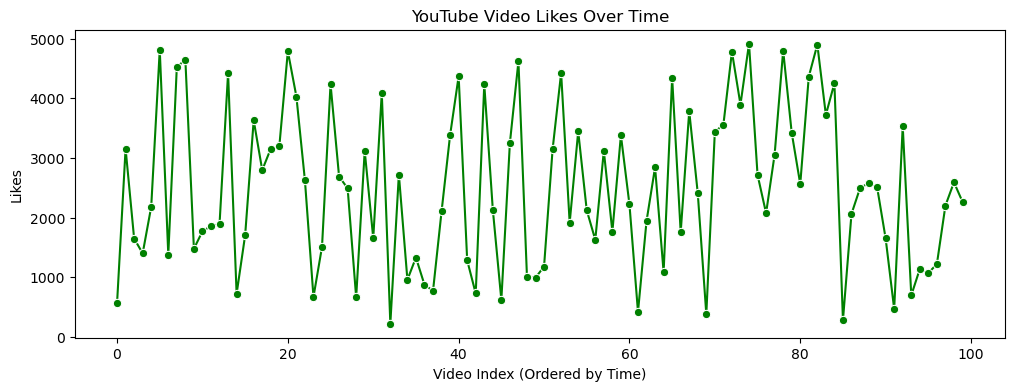

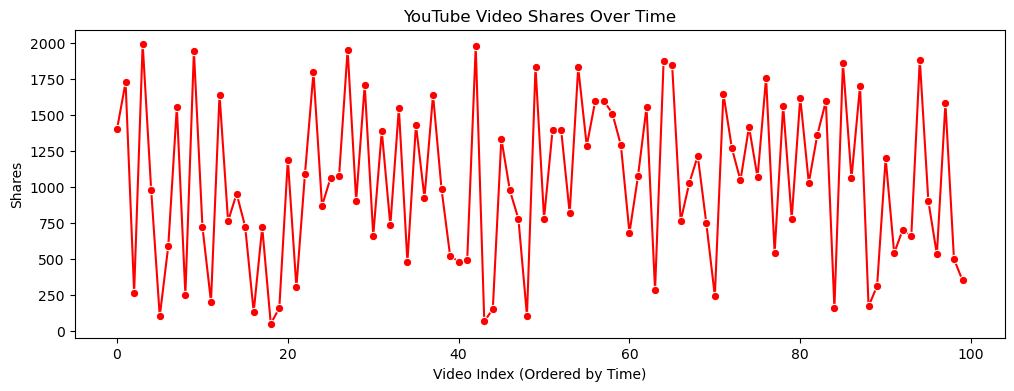

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("youtube_video_metrics_large.csv")

# Handling missing values
df.fillna({"Tags": "No Tags"}, inplace=True)

def engagement_rate(row):
    return (row["Likes"] + row["Shares"]) / row["Views"] if row["Views"] > 0 else 0

df["Engagement_Rate"] = df.apply(engagement_rate, axis=1)

# Statistical summarization
average_likes = df["Likes"].mean()
print(f"Average Likes per Video: {average_likes:.2f}")

# Data Aggregation: Views per category
views_per_category = df.groupby("Category")["Views"].sum()
print("\nTotal Views per Category:\n", views_per_category)

# Performance Metric Analysis: Likes to Views ratio
df["Likes_to_Views"] = df["Likes"] / df["Views"]

# Individual Graphs for Views, Likes, and Shares
plt.figure(figsize=(12, 4))
sns.lineplot(x=df.index, y=df["Views"], marker="o", color="blue")
plt.xlabel("Video Index (Ordered by Time)")
plt.ylabel("Views")
plt.title("YouTube Video Views Over Time")
plt.show()

plt.figure(figsize=(12, 4))
sns.lineplot(x=df.index, y=df["Likes"], marker="o", color="green")
plt.xlabel("Video Index (Ordered by Time)")
plt.ylabel("Likes")
plt.title("YouTube Video Likes Over Time")
plt.show()

plt.figure(figsize=(12, 4))
sns.lineplot(x=df.index, y=df["Shares"], marker="o", color="red")
plt.xlabel("Video Index (Ordered by Time)")
plt.ylabel("Shares")
plt.title("YouTube Video Shares Over Time")
plt.show()
